In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
from arcagi.data import Arcagi2
from arcagi.task import Task
from arcagi.grid import Grid
from arcagi.shapes import Shapes
from arcagi.plotting import plot_task, plot_grid
from arcagi.utils import io
import matplotlib.pyplot as plt

data = Arcagi2().get_data()
tasks = {key: {k:Task(task) for k,task in data[key].items()}
         for key in data.keys()}

In [24]:
tasks_is_same_size_all_input_output[:10]

['009d5c81',
 '03560426',
 '045e512c',
 '05269061',
 '05a7bcf2',
 '08ed6ac7',
 '09629e4f',
 '0962bcdd',
 '0b17323b',
 '0becf7df']

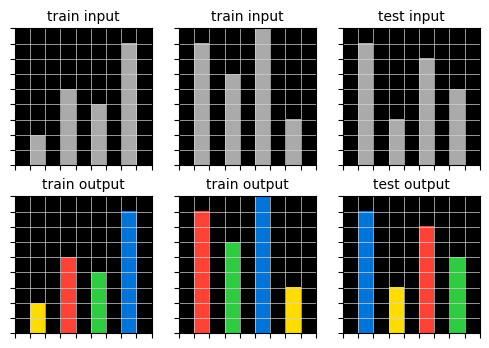

In [37]:
Task(data['training_challenges']['08ed6ac7'])

number or tasks where all inputs & outputs have the same size: 274
number or tasks where each input & output have the same size: 406
remaining other tasks: 320


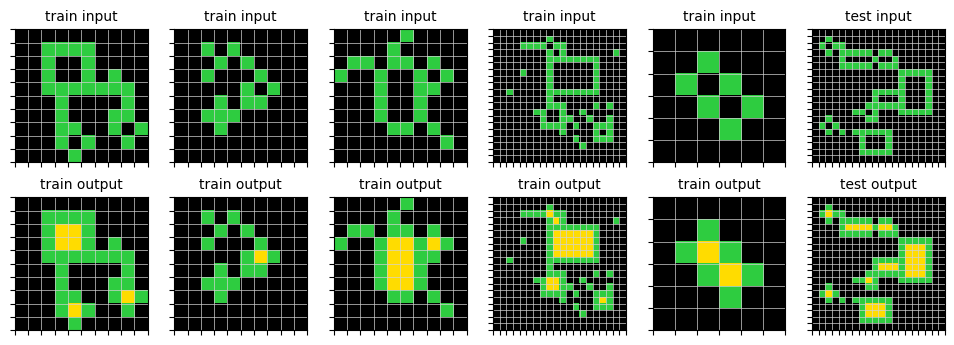

In [4]:
tasks_is_same_size_all_input_output = [key for key, task in tasks['training_challenges'].items() if task.is_same_size_all_input_output()]
tasks_is_same_size_each_input_output = [key for key, task in tasks['training_challenges'].items() if task.is_same_size_each_input_output()
                                        and key not in tasks_is_same_size_all_input_output]
other_tasks = [key for key in tasks['training_challenges'].keys()
               if key not in tasks_is_same_size_all_input_output and key not in tasks_is_same_size_each_input_output]

print(f'''number or tasks where all inputs & outputs have the same size: {len(tasks_is_same_size_all_input_output)}
number or tasks where each input & output have the same size: {len(tasks_is_same_size_each_input_output)}
remaining other tasks: {len(other_tasks)}''')

task = tasks['training_challenges'][tasks_is_same_size_each_input_output[0]]
task

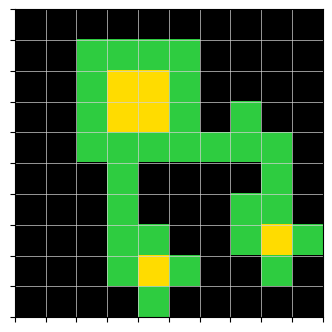

In [22]:
g = Grid(task.train[0]['output'])
g

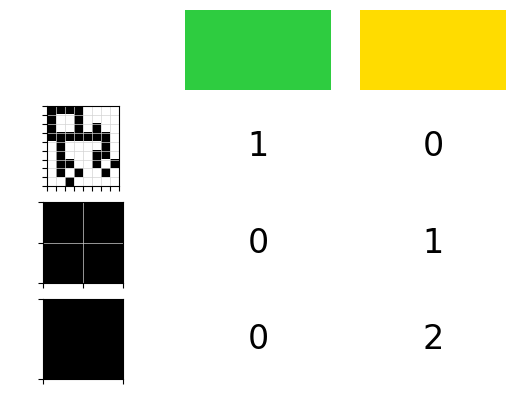

In [23]:
s = Shapes(g.grid, g.shapes[2])
s

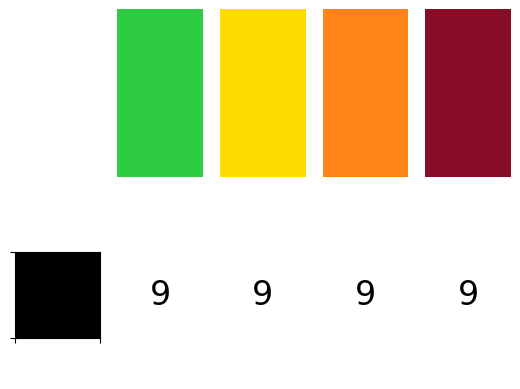

In [19]:
s

009d5c81 input


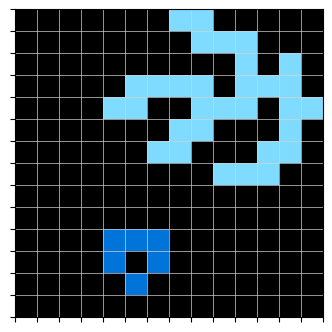

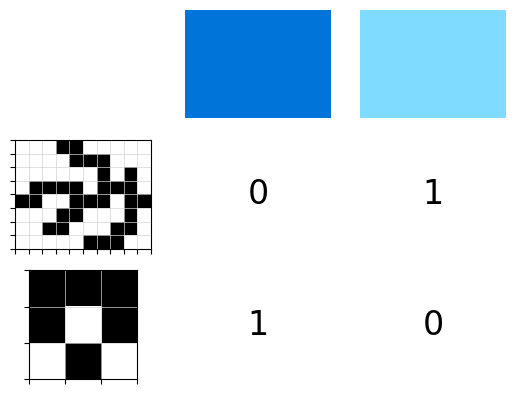


009d5c81 output


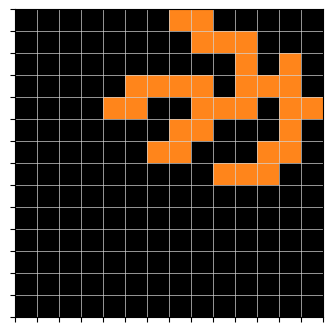

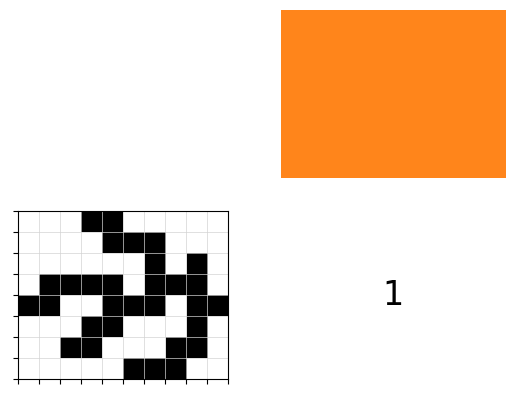


00d62c1b input


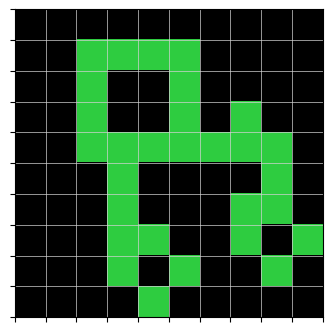

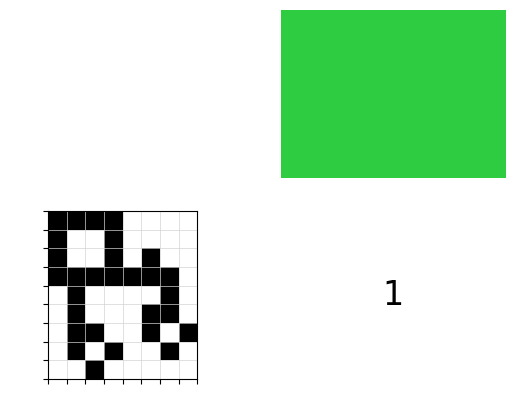


00d62c1b output


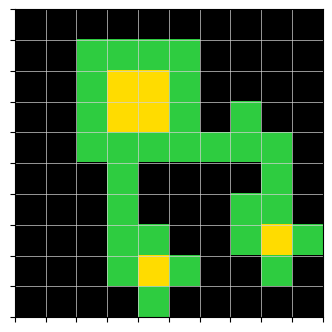

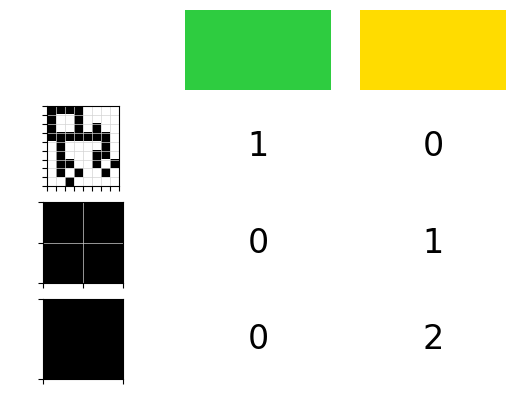


00576224 input


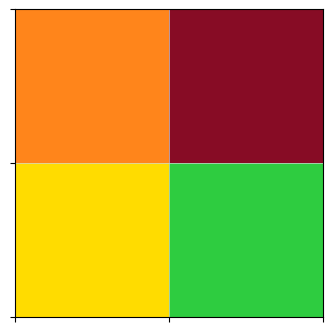

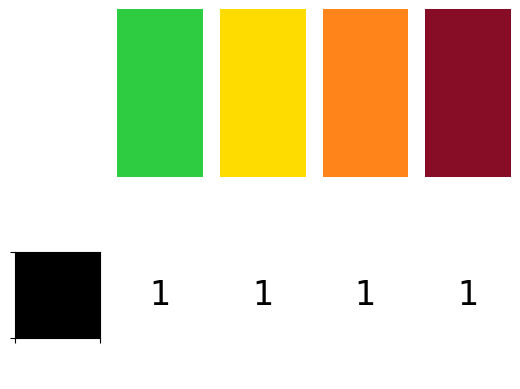


00576224 output


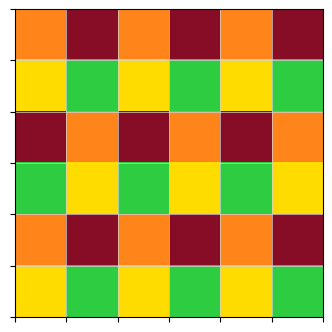

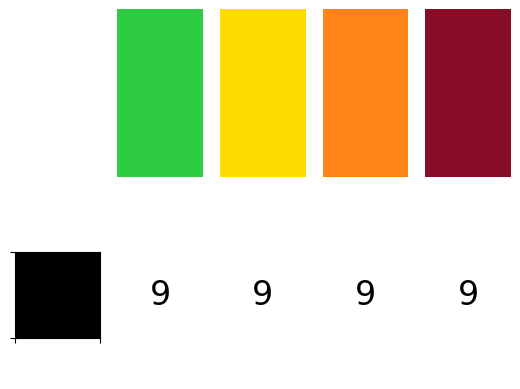

In [ ]:
for key in ['009d5c81', '00d62c1b', '00576224']:
    for e in io():
        g = Grid(tasks['training_challenges'][key].train[0][e])
        s = Shapes(g.grid, g.shapes[2])
        print(key, e)
        plot_grid(g.grid)
        s.plot_shapes()
        print()

In [ ]:
nombre = 42

# Créer une figure
fig, ax = plt.subplots(figsize=(3, 2))

# Afficher le nombre comme texte
ax.text(0.5, 0.5, str(nombre), fontsize=24, ha='center', va='center')

# Désactiver les axes
ax.axis('off')

# Afficher la figure
plt.show()

In [ ]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(2, 2))
i = 1
# Créer un rectangle (carré)
rectangle = patches.Rectangle((0, 0), 1, 1, linewidth=0, edgecolor='none', facecolor=cmap.colors[i])

# Ajouter le rectangle à l'axe
ax.add_patch(rectangle)

# Définir les limites des axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Désactiver les axes
ax.axis('off')

# Afficher la figure
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import random

# Colors: 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00', '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

In [ ]:
cmap.colors[0]

In [ ]:
dict_grid = \
{str(i)+'_'+input_or_output:Grid(task.train[i][input_or_output])
 for i in range(len(task.train)) for input_or_output in ['input', 'output']}

In [ ]:
dict_grid['1_output'].describe_plot()

In [ ]:
s = Shapes(dict_grid['0_input'])

In [ ]:
s.color_to_shapes2